<a href="https://colab.research.google.com/github/janetgarzaa/janetgarzaa/blob/main/DABP14000_GroupPANDAS_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<b> DABP14000 Final Project </b>
<p>Team name: Pandas
<p>Members: Ashley Smith, Janet Garza Robledo, Michael McCullough, Steve Veldman

[Link to Google Colab Notebook](https://colab.research.google.com/drive/1X3_vjFvdNcYO38vH8Ry2-_clTbgnXGru)                  
[Link to Presentation Slide Deck](https://docs.google.com/presentation/d/1iRc61sGM86zwhdvxIKEPAuVdwGnPcTcM/edit#slide=id.p1)

##<b> Project Goal </b>
1. Our goal is to develop a model to predict if an individual is at risk for opioid abuse. Based on the available data set, we selected use of heroin as a proxy for opioid abuse. This is predicated on the assumption/general public health consensus that use of heroin is a strong indicator of the advanced stages of opioid abuse (references at end of notebook).
<p>Using machine learning, we will build a model to identify at-risk individuals based on personality factors, demographics, and use of potential gateway drugs.
2. This will aid public health agencies, schools, and social service organizations in identifying high risk individuals and developing targeted early intervention strategies.

##<b>I: Background and Data Loading</b>

**Background:**

* Our dataset was located through the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#). The data consists of records from 1,885 survey respondents collected as part of a research effort (Fehrman et al, "The Five Factor Model of personality and evaluation of drug consumption risk" - link in references at end of notebook). Each record represents one individual's response.

* There are 32 attributes, including demographic information, personality measurements, and self-reported use of 18 legal and illegal drugs. See "Data Description" section below for details.

<b> Data Description </b>

1. ID - The number of record in the original database and is not related to the participant.

2. Age - the age of the participant is categorized into 6 age-band groups: 18-24, 25-34, 35-44, 45-54, 55-64, and 65+.

3. Gender - Two identified genders: Male and Female.

4. Education - There are nine education categories showing the level of education of a participant. They are as follows: left school before 16 yrs. ('<16'), left school at 16 yrs. ('16'), left school at 17 yrs. ('17'), left school at 18 yrs. ('18'), Some College/University ('S.U.'), Professional Certificate/Diploma ('P.C.'), University Degree ('BS'), Master Degree ('MS'), Doctorate Degree ('PhD').


5. Country - The country of current residence of participant. There are seven possible values: Australia ('AUS'), Canada ('CAN'), New Zealand ('NZ'), Other ('Othr'), Republic of Ireland ('IRL'), UK, and USA.

6. Ethnicity - The participant's ethnicity could fit one of the seven categories: Asian ('Asn'), Black ('Blk'), Mixed-Black/Asian ('MB/A'), Mixed-White/Asian ('MW/A'), Mixed-White/Black ('MW/B'), Other ('Othr'), or White ('Wht').

Personality Scores: The raw score for each factor of the NEO-FFI-R was converted into a T-Score based on normative data.


**T-score = 10[(Raw Score - Normative mean score)/(Normative STD. Dev.)] +50**


7. Nscore - This is a type of personality score called a Neuroticism score. Neuroticism (N) is a long-term tendency to experience negative emotions suchas nervousness, tension, anxiety and depression. There are 49 scores in this category:

8. Escore - This personality score is an Extraversion score. Extraversion (E) is manifested in outgoing, warm, active, assertive, talkative,
cheerful, and in search of stimulation characteristic. There are 42 scores in this category:

9. Oscore - This personality score is an Openness score. Openness to experience (O) is a general appreciation for art, unusual ideas, and imaginative, creative, unconventional, and wide interests. There are 35 scores in this category:

10. Ascore - This personality score is an Agreeableness score. Agreeableness (A) is a dimension of interpersonal relations, characterized by
altruism, trust, modesty, kindness, compassion and cooperativeness. There are 41 scores in this category:

11. Cscore - This personality score is a Conscientousness score. Conscientiousness (C) is a tendency to be organized and dependable,
strong-willed, persistent, reliable, and efficient. There are 41 scores in this category:

12. Impulsive - This is an impulsive value measured by BIS-11 which is Barratt's Impulsiveness Scale. The BIS-11 is a 30-item self-report questionnaire measuring  behavioural
construct of impulsiveness, and comprises three subscales: motor impulsiveness, attentional impulsiveness, and non-planning. There are 10 possible values within this attribute. The higher the BIS-11 score, the higher the impulsivity level.

13. SS - This is sensation seeking and is measured by ImpSS. This tool is regarded as a measure of a general sensation-seeking trait. The scale consists of 19 T or F statements comprising 8 items measuring impulsiveity and 11 items gauging sensation-seeking. The ImpSS is considered a valid and reliable measure of high risk beahvioural correlates, such as substance abuse.

<p> Variables 14-32 consist of 18 legal and illegal drugs, with responses broken into the following use classes:

* CL0 - Never Used
* CL1 - Used over a Decade Ago
* CL2 - Used in Last Decade
* CL3 - Used in Last Year
* CL4 - Used in Last Month
* CL5 - Used in Last Week
* CL6 - Used in Last Day

<p> The surveyed drugs were: alcohol, amphetamines, amyl nitrite, benzodiazepine, caffeine, cannabis, chocolate, cocaine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine, semeron (fictitious drug to identify over-claimers), and volatile Substance Abuse.


**Possible Problems in modeling:**

**Extreme values:** some features in the dataset have a few extreme values that may have too much of an influence on the model and may need to be removed in order to create a more accurate model

**Skewed distributions:** Some features have heavily skewed distributions that may have to be transfomred and normalized before fitting the model to create an accurate model

**Imbalanced classes:** Some of the drug use features have a small number of respondents reporting a high level of drug use. This can cause issues with overfitting or creating a biased model. We can use under or oversampling to help solve this issue

**Categorical predictors:** The dataset includes multiple categorical predictors such as gender, education level etc. In order for these categorical variables to be used in the model, they will need to be properly encoded .

**Feature Elimination:** The biggest challenge we anticipate is paring down the predictor variables into a manageable number of features.

**Normalized values: ** This dataset underwent considerable transformation as a result of the origional research effort that generated it. For initial EDA we converted columns back to their plain-language values. As we evolve our model it is likely we will revert back to the standardized/normalized values for at least some of the data.

In [ ]:
#Load Data and Basic Python Libraries

from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all"
!pip -q install -U statsmodels > log.txt

import numpy as np, pandas as pd, matplotlib.pyplot as plt, scipy, seaborn as sns, statsmodels.api as sm, pprint
import sklearn, platform, matplotlib, datetime, graphviz
from sklearn.model_selection import train_test_split as tts, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, accuracy_score, recall_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier

# %matplotlib inline
print(f"Last modified on {datetime.datetime.now()}")
df = pd.read_csv('https://raw.githubusercontent.com/SVeldman/DABP14000_GroupPANDAS/042dbe09815592efa4239a387fee6a7f459045ac/Drug%20Consumption%20(Quantified)%20Dataset.csv')


Last modified on 2023-03-04 23:42:38.203387


In [ ]:
df.head(4)

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,...,Ecstasy,Heroin,Ketamine,Legal Highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,Volitile Substance Abuse
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0


##<b>II: Data Preparation and EDA</b>

In [ ]:
#Rename columns to shorter, more useable names:
df.rename(columns={'Education': 'Edu', 'Country': 'Ctry', 'Ethnicity':'Ethni', 'Neuroticism':'Nscore', 'Extraversion':'Escore', 'Openness':'Oscore',
                   'Agreeableness':'Ascore', 'Conscientiousness':'Cscore', 'Impulsiveness':'Impls', 'Sensation Seeking':'SS', 'Alcohol':'Alc', 'Amphetamine':'Amph',
                   'Amyl Nitrate':'Amyl', 'Benzodiazepine':'Benzo', 'Caffeine':'Caf', 'Cannabis':'Cann', 'Chocolate':'Choc', 'Cocaine':'Coke', 'Ecstasy':'Ecs',
                   'Ketamine':'Ket', 'Legal Highs':'LegH', 'Methadone':'Methd', 'Mushrooms':'Mush', 'Nicotine':'Nic', 'Semeron':'Sem', 'Volitile Substance Abuse':'VSA'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1885 non-null   int64  
 1   Age     1885 non-null   float64
 2   Gender  1885 non-null   float64
 3   Edu     1885 non-null   float64
 4   Ctry    1885 non-null   float64
 5   Ethni   1885 non-null   float64
 6   Nscore  1885 non-null   float64
 7   Escore  1885 non-null   float64
 8   Oscore  1885 non-null   float64
 9   Ascore  1885 non-null   float64
 10  Cscore  1885 non-null   float64
 11  Impls   1885 non-null   float64
 12  SS      1885 non-null   float64
 13  Alc     1885 non-null   object 
 14  Amph    1885 non-null   object 
 15  Amyl    1885 non-null   object 
 16  Benzo   1885 non-null   object 
 17  Caf     1885 non-null   object 
 18  Cann    1885 non-null   object 
 19  Choc    1885 non-null   object 
 20  Coke    1885 non-null   object 
 21  Crack   1885 non-null   object 
 22  

In [ ]:
# Designated 'dfc' for 'dataframe - cleaned' - used for data preparation until we are ready to build df0 for our baseline model
dfc = df.copy()

# For purposes of this analysis we are condensing our response variable ('Heroin') into two classes - "Never Used" (0) and "Has Used" (1):
mappingH = {'CL0': 0, 'CL1': 1, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
dfc.replace({'Heroin': mappingH}, inplace=True)

# Some data transformation had already been done to this data set.
# Personality trait measurements were presented in standardized form, and we chose to leave those as such.

# The categorical demographic variables were encoded as numerical variables.
# We chose to convert them from assigned numerical variables to plain-language form:
mappingA = {-0.95197: '18-24', -0.07854: '25-34', 0.49788: '35-44', 1.09449: '45-54', 1.82213: '55-64', 2.59171: '65+'}
dfc.replace({'Age': mappingA}, inplace=True)

mappingG = {0.48246: 'Female', -0.48246: 'Male'}
dfc.replace({'Gender': mappingG}, inplace=True)

mappingE = {-2.43591: '<16', -1.7379: '16', -1.43719: '17', -1.22751: '18', -0.61113: 'S.U.',
            -0.05921: 'P.C.', 0.45468: 'BS', 1.16365: 'MS', 1.98437: 'PhD'}
dfc.replace({'Edu': mappingE}, inplace=True)

mappingC = {-0.09765:'AUS', 0.24923:'CAN', -0.46841:'NZ', -0.28519:'Othr', 0.21128:'IRL', 0.96082:'UK', -0.57009:'USA'}
dfc.replace({'Ctry': mappingC}, inplace=True)

mappingEt = {-0.50212:'Asn', -1.10702:'Blk', 1.90725:'MB/A', 0.126:'MW/A', -0.22166:'MW/B', 0.1144:'Othr', -0.31685:'Wht'}
dfc.replace({'Ethni': mappingEt}, inplace=True)

#Dropped 'ID' as the individual respondent ID numbers are irrelevant to our analysis, and pandas has assigned row indexes:
dfc.drop('ID', inplace = True, axis = 1)

#dfc.head().T

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1885 non-null   object 
 1   Gender  1885 non-null   object 
 2   Edu     1885 non-null   object 
 3   Ctry    1885 non-null   object 
 4   Ethni   1885 non-null   object 
 5   Nscore  1885 non-null   float64
 6   Escore  1885 non-null   float64
 7   Oscore  1885 non-null   float64
 8   Ascore  1885 non-null   float64
 9   Cscore  1885 non-null   float64
 10  Impls   1885 non-null   float64
 11  SS      1885 non-null   float64
 12  Alc     1885 non-null   object 
 13  Amph    1885 non-null   object 
 14  Amyl    1885 non-null   object 
 15  Benzo   1885 non-null   object 
 16  Caf     1885 non-null   object 
 17  Cann    1885 non-null   object 
 18  Choc    1885 non-null   object 
 19  Coke    1885 non-null   object 
 20  Crack   1885 non-null   object 
 21  Ecs     1885 non-null   object 
 22  

In [ ]:
dfcStats = dfc.describe().drop('count')
dfcStats.loc['IQR'] = dfcStats.loc['75%'] - dfcStats.loc['25%']
dfcStats = dfcStats.append(dfc.reindex(dfcStats.columns, axis=1).agg(['skew', 'mad', 'kurt']))
mapper = {'ID':'{0:.0f}', 'Nscore':'{0:.5f}', 'Escore':'{0:.4f}', 'Oscore':'{0:.4f}', 'Ascore':'{0:.4f}', 'Cscore':'{0:.4f}', 'Impls':'{0:.3f}', 'SS':'{0:.3f}'}
dfcStats.style.format(mapper)

,Nscore,Escore,Oscore,Ascore,Cscore,Impls,SS,Heroin
mean,0.00005,-0.0002,-0.0005,-0.0002,-0.0004,0.007,-0.003,0.148541
std,0.99811,0.9974,0.9962,0.9974,0.9975,0.954,0.964,0.355730
min,-3.46436,-3.2739,-3.2739,-3.4644,-3.4644,-2.555,-2.078,0.000000
25%,-0.67825,-0.6951,-0.7173,-0.6063,-0.6525,-0.711,-0.526,0.000000
50%,0.04257,0.0033,-0.0193,-0.0173,-0.0066,-0.217,0.080,0.000000
75%,0.62967,0.6378,0.7233,0.7610,0.5849,0.530,0.765,0.000000
max,3.27393,3.2739,2.9016,3.4644,3.4644,2.902,1.922,1.000000
IQR,1.30792,1.3329,1.4406,1.3673,1.2374,1.241,1.291,0.000000
skew,-0.00006,-0.0017,-0.0103,-0.0039,-0.0051,0.073,-0.041,1.978086
mad,0.79708,0.7941,0.7945,0.7957,0.7952,0.779,0.782,0.252953


**Observations on info():**

1. There are no missing values in the data frame, with 1885 non null values. So there is no need to impute any values to fill in missing data

2. Most of the columns are object data types, which means that they contain categorical or text data. These data objects will need to be transformed before using them in the model.

3. The other columns are numeric, with 7 columns having a float64 data type and 2 columns having an int64 datatype

4. This dataframe is relatively large with the 471k of memory usage

**Observations on describe():**

1. The mean values of all numerical features are close to zero, which is expected in a standardized dataset.

2. The standard deviation of all features is close to one, which is expected in a standardized dataset.

3. The minimum and maximum values of Nscore, Escore, Oscore, Ascore, Cscore, Impls, and SS are within the expected range of -3 to 3.



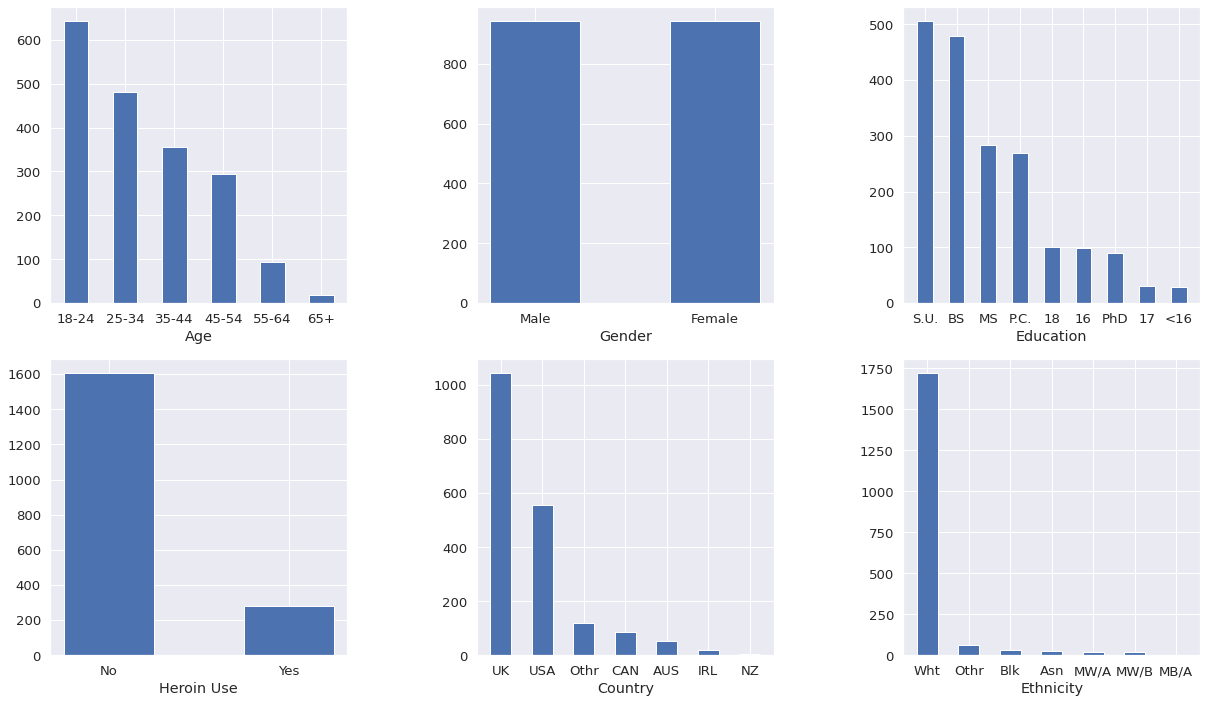

In [ ]:
# Histograms of categorical (demographic) variables and response variable (heroin use):
plt.figure(figsize=(17,10))

plt.subplot(231)
catsAge = dfc['Age'].value_counts().index
cntsAge = dfc['Age'].value_counts().values
plt.bar(catsAge, cntsAge, width=0.5)
plt.xlabel('Age')

plt.subplot(232)
catsGen = dfc['Gender'].value_counts().index
cntsGen = dfc['Gender'].value_counts().values
plt.bar(catsGen, cntsGen, width=0.5)
plt.xlabel('Gender')

plt.subplot(233)
catsEd = dfc['Edu'].value_counts().index
cntsEd = dfc['Edu'].value_counts().values
plt.bar(catsEd, cntsEd, width=0.5)
plt.xlabel('Education')

plt.subplot(234)
catsH = dfc['Heroin'].value_counts().index.astype(object)
cntsH = dfc['Heroin'].value_counts().values
plt.bar(catsH, cntsH, width=0.5)
plt.xlabel('Heroin Use')
plt.xticks(ticks = (0,1), labels = ('No', 'Yes'))

plt.subplot(235)
catsCt = dfc['Ctry'].value_counts().index
cntsCt = dfc['Ctry'].value_counts().values
plt.bar(catsCt, cntsCt, width=0.5)
plt.xlabel('Country')

plt.subplot(236)
catsEth = dfc['Ethni'].value_counts().index
cntsEth = dfc['Ethni'].value_counts().values
plt.bar(catsEth, cntsEth, width=0.5)
plt.xlabel('Ethnicity')

plt.tight_layout(w_pad=6);

**Histogram Observations:**

* Age of respondents is skewed towards younger age groups, with 18-24 being the most common, and decreasing with each progressively older age group.
* Respondents were split evenly between male and female.
* Respondents were, for the msot part, fairly educated. "Some University" and "University Degree" comprised the most responses, while "Master's Degree" and "Professional Certificate/Diploma" were still large groups. PhD's and individuals who chose to leave school at 18 years or younger comprised a relatively small number of respondents each.
* The majority of respondents (~85%) have never used heroin.
* The majority of respondents were from teh US or UK, with the UK comprising the largest group.
* The majority of respondents were white, with all other ethnic groups being very small.

<b> Discuss Data Types and Missing Values for DFc </b>
* The data set contains 24 object/categorical variables (demographic information, druge use classes) and 7 float values (the personality measurements).
* There are fortunately no missing values in this dataset.
* As we moved forward decisions were made regarding combining response classes for the many categorical variables, and to keep the standardized scores for the personality measurements rather than convert them back to raw form.

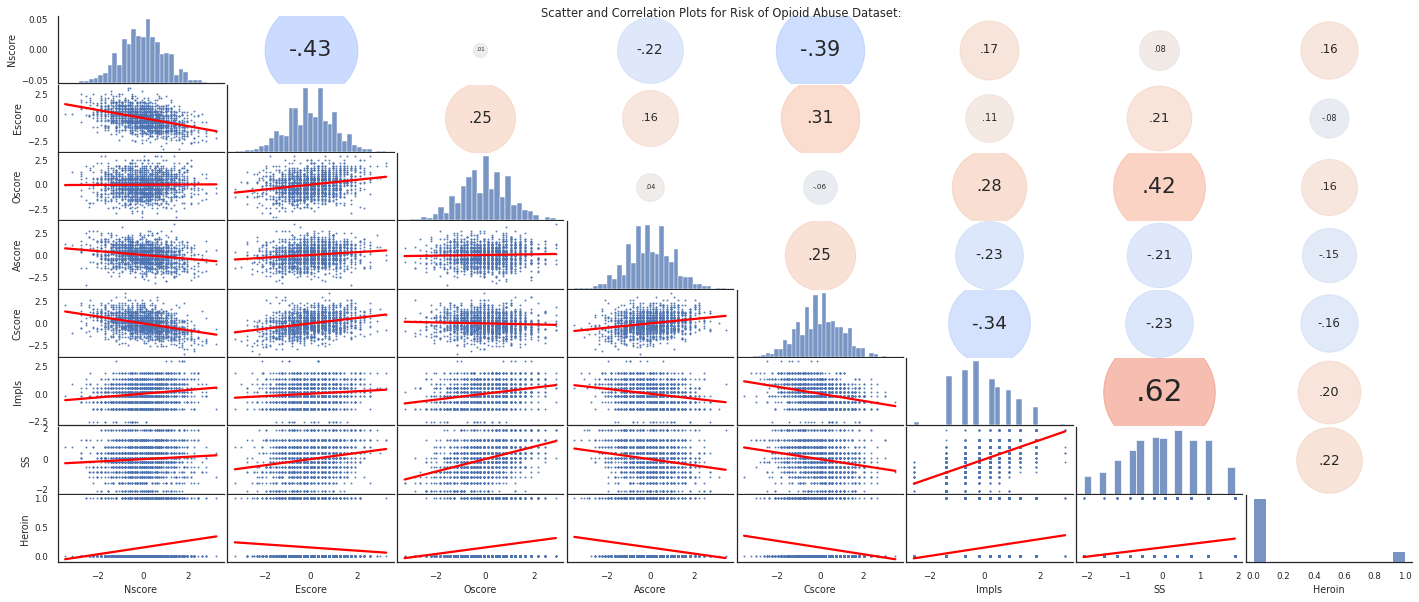

In [ ]:
# Pairplot with trend lines and Pearson correlation coefficients:

def corrdot(*args, **kwargs):   # Credit in References
  corr_r = args[0].corr(args[1], 'pearson')
  corr_text = f"{corr_r:2.2f}".replace("0.", ".")
  ax = plt.gca();   ax.set_axis_off();
  msz, fsz = abs(corr_r) * 20000, abs(corr_r) * 40 + 5  # marker and font sizes
  ax.scatter([.5], [.5], msz, [corr_r], alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1, transform=ax.transAxes)
  ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction", ha='center', va='center', fontsize=fsz)

sns.set(style='white', font_scale=.8);
g = sns.PairGrid(dfc, aspect=1, diag_sharey=False);
g.fig.set_size_inches(20, 8)
g.map_lower(sns.regplot, ci=False, line_kws={'color':'red'}, scatter_kws={'s':1});
g.map_diag(sns.histplot, kde_kws={'color':'black'});
g.map_upper(corrdot);
g.fig.suptitle("Scatter and Correlation Plots for Risk of Opioid Abuse Dataset:", y=1);
tmp = plt.subplots_adjust(hspace=0.02, wspace=0.02);
tmp = plt.show();

**Observations**

**Correlation:** The correlation dot plot shows moderately strong positive correlations between some pairs of variables, such as between Sensation Seeking and Impulsiveness, and Sensation Seeking and Openness. It also showed moderate negative corellation between several variables, such as Neuroticism and Extroversion, and between Conscientiousness and Impulsiveness.

**Scatter Plot:** The scatter plots reveal that some variables have linear relationships with each other (though not particularly strong ones), such as the negative relationship between Neuroticism and Extroversion, while others have more complex relationships, or perhaps no clear relationship.

**Histogram:**
The histograms show that some variables (such as Nueroticism and openness), are approximately normally distributed, while others (such as Sensation-Seeking) have a skewed distribution.

**Outliers**
There are some outliers visible in the scatter plots, particularly for the variable Impulsiveness, which has some low values that sit apart from the rest of the distribution.

##<b>III: Baseline Model and Initial Improvements</b>

### Model 0 - Baseline Model
* Selected Modeling Technique - Logistic Regression
* Performance Metrics - Out of Sample Accuracy and AUROC
* Selected Variables:
  <p>Along with our response variable ('Heroin'), we elected to build our baseline model using the 5 demographic variables and 7 personality measurements. Future iterations/improvements will address the selection of drug use variables for more complex models, and remove insignificant variables.


In [ ]:
#Drop drug use variables:
df0 = dfc.drop(['Alc', 'Amph', 'Amyl', 'Benzo', 'Caf', 'Cann', 'Choc', 'Coke', 'Crack', 'Ecs',
               'Ket', 'LegH', 'LSD', 'Methd', 'Mush', 'Nic', 'Sem', 'VSA'], axis = 1)

#Convert Gender to binary variable:
df0.replace({'Gender': {'Female': 1, 'Male': 0}}, inplace = True)
df0.rename(columns={'Gender': 'Gender_F'}, inplace = True)

df0.head()

,Age,Gender_F,Edu,Ctry,Ethni,Nscore,Escore,Oscore,Ascore,Cscore,Impls,SS,Heroin
0,35-44,1,P.C.,UK,MW/A,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,25-34,0,PhD,UK,Wht,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
2,35-44,0,P.C.,UK,Wht,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
3,18-24,1,MS,UK,Wht,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
4,35-44,1,PhD,UK,Wht,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0


In [ ]:
#Get dummies for Age, Education, Country, Ethnicity
df0 = pd.get_dummies(df0, columns=['Age', 'Edu', 'Ctry', 'Ethni'], drop_first = True)

In [ ]:
df0.head().T

,0,1,2,3,4
Gender_F,1.00000,0.00000,0.00000,1.00000,1.00000
Nscore,0.31287,-0.67825,-0.46725,-0.14882,0.73545
Escore,-0.57545,1.93886,0.80523,-0.80615,-1.63340
Oscore,-0.58331,1.43533,-0.84732,-0.01928,-0.45174
Ascore,-0.91699,0.76096,-1.62090,0.59042,-0.30172
Cscore,-0.00665,-0.14277,-1.01450,0.58489,1.30612
Impls,-0.21712,-0.71126,-1.37983,-1.37983,-0.21712
SS,-1.18084,-0.21575,0.40148,-1.18084,-0.21575
Heroin,0.00000,0.00000,0.00000,0.00000,0.00000
Age_25-34,0.00000,1.00000,0.00000,0.00000,0.00000


In [ ]:
tX, vX, tY, vY = tts(df0.drop('Heroin', axis=1), df0['Heroin'], test_size=0.2, random_state=0)
m0 = sm.Logit(tY, tX).fit(maxiter=5000)

# We are aware that this cell will throw the warning "Maximum number of iterations has been exceeded."
# The 'maxiter' setting that allowed the model to converge took a very long time to run, and ultimately did not change the results.
# For efficiency when running the workbook we reduced the maximum iterations.

         Current function value: 0.335319
         Iterations: 5000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(m0.summary(title = 'Baseline Model - Risk of Opioid Abuse', alpha = .05))

                    Baseline Model - Risk of Opioid Abuse                     
Dep. Variable:                 Heroin   No. Observations:                 1508
Model:                          Logit   Df Residuals:                     1475
Method:                           MLE   Df Model:                           32
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.2106
Time:                        23:43:13   Log-Likelihood:                -505.66
converged:                      False   LL-Null:                       -640.56
Covariance Type:            nonrobust   LLR p-value:                 1.990e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gender_F      -0.4110      0.179     -2.294      0.022      -0.762      -0.060
Nscore         0.2538      0.100      2.544      0.011       0.058       0.449
Escore        -0.0883      0.097     -0.906      0.3

Observations:

1. First, the model has a pseudo R-squared value of 0.2091, indicating that the model explains around 20% of the variability in the outcome variable.

2. Second, the LLR p-value of 4.601e-399 indicates that the model as a whole is statistically significant, suggesting that at least some of the predictors included in the model are related to the outcome variable.

3. Third, some of the individual predictors in the model are statistically significant. Most levels of higher education are statistically significant and have a negative coefficient, indicating that those groups are less likely to have used heroin than individuals who left school at 16 (the dropped dummy variable).






In [ ]:
pY_prob = m0.predict(vX)
pY = np.where(pY_prob>0.5, 1, 0)
OOS_accuracy_m0 = sum(pY == vY)/len(vY)
print('Out of Sample Accuracy = ', OOS_accuracy_m0)
auc = roc_auc_score(vY, pY_prob)
print('Area Under ROC Curve = ', auc)

Out of Sample Accuracy =  0.8594164456233422
Area Under ROC Curve =  0.8097041420118343


The out-of-sample accuracy is 0.856, which means that the model correctly classified 85.6% of the samples in the test set.

The AUC is 0.805; the model is able to distinguish between the positive and negative samples reasonably well, but there is still room for improvement.



Out of Sample Accuracy = 0.86



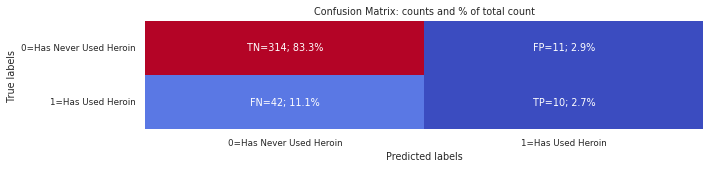

In [ ]:
print('Out of Sample Accuracy = %0.2f' % OOS_accuracy_m0)
print()
cm = confusion_matrix(vY, pY)
MsTxt = np.char.array([['TN','FP'], ['FN','TP']]) + '='
MsTxt = MsTxt + cm.astype('str') + '; ' + (cm/cm.sum() * 100).round(1).astype('str') + '%'
_, ax = plt.subplots(figsize=(10, 2))
aLbl = np.array(['0=Has Never Used Heroin', '1=Has Used Heroin'])
dfCM = pd.DataFrame(cm, index=aLbl, columns=aLbl)
ax = sns.heatmap(dfCM, annot=MsTxt, cbar=False, cmap='coolwarm', fmt='', ax=ax)
ax.set_title('Confusion Matrix: counts and % of total count')
ax.set(xlabel='Predicted labels', ylabel='True labels')
sns.set(font_scale=1.2);

The baseline model produced a high percentage of true negatives, but also more false negatives than false positives or true positives. Due to the purpose of this model, we may want to adjust the classification threshold to err on the side of producing false positives rather than false negatives (in practice it may be more beneficial to take intervention steps with an indivdual who may not need them than risk missing an individual who does).

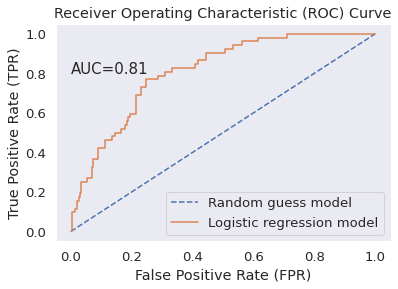

In [ ]:
fpr, tpr, thresholds = roc_curve(vY, pY_prob)

plt.title('Receiver Operating Characteristics')
plt.plot([0,1], [0,1], linestyle='--', label='Random guess model')
plt.plot(fpr, tpr, marker='', label='Logistic regression model')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.text(0, 0.8, f'AUC={auc:.2f}', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid();

The AUC for the logistic regression model is 0.81, indicating that the model is able to distinguish between positive and negative samples with a reasonable level of accuracy. However, the AUC is not extremely high, suggesting that there is still room for improvement in the model's performance.






### Model 1 - Improvement of Baseline Model
*   Combined/grouped responses within several categorical variables in order to streamline our model.



In [ ]:
# Used 'df1c' for new dataframe for combined/grouped categorical responses:
df1c = dfc.copy()

mappingE = {'<16':'<=18', '16':'<=18', '17':'<=18', '18':'<=18', 'MS':'GradDeg', 'PhD':'GradDeg'}
df1c.replace({'Edu': mappingE}, inplace=True)

mappingC = {'AUS':'AUS/NZ', 'NZ':'AUS/NZ', 'IRL':'UK/IRL', 'UK':'UK/IRL'}
df1c.replace({'Ctry': mappingC}, inplace=True)

mappingEt = {'MB/A':'MB/W/A', 'MW/A':'MB/W/A', 'MW/B':'MB/W/A'}
df1c.replace({'Ethni': mappingEt}, inplace=True)

# Converted Gender to binary variable:
df1c.replace({'Gender': {'Female': 1, 'Male': 0}}, inplace = True)
df1c.rename(columns={'Gender': 'Gender_F'}, inplace = True)

#Generated dummy variables and dropped one for each:
df1c = pd.get_dummies(df1c, columns=['Age', 'Edu', 'Ctry', 'Ethni'])
df1c = df1c.drop(['Ethni_Asn', 'Ctry_USA', 'Edu_<=18', 'Age_18-24'], axis = 1)

# Kept 'df1c' as separate dataframe to build off of in Model 2.
# df1 - dropped drug use variables for improved baseline model (will be incorporated later in Model 2):

df1 = df1c.drop(['Alc', 'Amph', 'Amyl', 'Benzo', 'Caf', 'Cann', 'Choc', 'Coke', 'Crack', 'Ecs',
               'Ket', 'LegH', 'LSD', 'Methd', 'Mush', 'Nic', 'Sem', 'VSA'], axis = 1)

#df1.head().T

In [ ]:
tX, vX, tY, vY = tts(df1.drop('Heroin', axis=1), df1['Heroin'], test_size=0.2, random_state=0)
m1 = sm.Logit(tY, tX).fit(maxiter=4000)

Optimization terminated successfully.
         Current function value: 0.337138
         Iterations 3672


In [ ]:
print(m1.summary(title = ' Model 1 (Improved Baseline Model) - Risk of Opioid Abuse', alpha = .05))

           Model 1 (Improved Baseline Model) - Risk of Opioid Abuse           
Dep. Variable:                 Heroin   No. Observations:                 1508
Model:                          Logit   Df Residuals:                     1483
Method:                           MLE   Df Model:                           24
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.2063
Time:                        23:43:15   Log-Likelihood:                -508.40
converged:                       True   LL-Null:                       -640.56
Covariance Type:            nonrobust   LLR p-value:                 2.367e-42
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Gender_F        -0.4178      0.178     -2.344      0.019      -0.767      -0.068
Nscore           0.2470      0.099      2.487      0.013       0.052       0.442
Escore          -0.1014      0.097     -1.04

In [ ]:
pY_prob = m1.predict(vX)
pY = np.where(pY_prob>0.5, 1, 0)
OOS_accuracy_m1 = sum(pY == vY)/len(vY)
print('Out of Sample Accuracy = ', OOS_accuracy_m1)
auc = roc_auc_score(vY, pY_prob)
print('Area Under ROC Curve = ', auc)

Out of Sample Accuracy =  0.8620689655172413
Area Under ROC Curve =  0.8125443786982249


**Observations:**

<p>This model made small improvements. Our next models will add drug use variables and then remove insignificant variables.

### Model 2 - Introduced Drug-Use Data as Predictor Variables
*   Used binary variables (never used/has used) for the other drugs covered in our dataset



In [ ]:
# Used 'df2' to add drug use data:
df2 = df1c.copy()

# For simplicity, we condensed drug variables into two classes - "Never Used" (0) and "Has Used" (1):
mappingAlc = {'CL0': 0, 'CL1': 1, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
df2.replace({'Alc': mappingAlc}, inplace=True)

mappingAmph = {'CL0': 0, 'CL1': 1, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
df2.replace({'Amph': mappingAmph}, inplace=True)

mappingAmyl = {'CL0': 0, 'CL1': 1, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
df2.replace({'Amyl': mappingAmyl}, inplace=True)

mappingBenzo = {'CL0': 0, 'CL1': 1, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
df2.replace({'Benzo': mappingBenzo}, inplace=True)

mappingCaf = {'CL0': 0, 'CL1': 1, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
df2.replace({'Caf': mappingCaf}, inplace=True)

mappingCann = {'CL0': 0, 'CL1': 1, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
df2.replace({'Cann': mappingCann}, inplace=True)

mappingCoke = {'CL0': 0, 'CL1': 1, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
df2.replace({'Coke': mappingCoke}, inplace=True)

mappingEcs = {'CL0': 0, 'CL1': 1, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
df2.replace({'Ecs': mappingEcs}, inplace=True)

mappingKet = {'CL0': 0, 'CL1': 1, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
df2.replace({'Ket': mappingKet}, inplace=True)

mappingLegH = {'CL0': 0, 'CL1': 1, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
df2.replace({'LegH': mappingLegH}, inplace=True)

mappingLSD = {'CL0': 0, 'CL1': 1, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
df2.replace({'LSD': mappingLSD}, inplace=True)

mappingMush = {'CL0': 0, 'CL1': 1, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
df2.replace({'Mush': mappingMush}, inplace=True)

mappingNic = {'CL0': 0, 'CL1': 1, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
df2.replace({'Nic': mappingNic}, inplace=True)

mappingVSA = {'CL0': 0, 'CL1': 1, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
df2.replace({'VSA': mappingVSA}, inplace=True)

# We dropped four of the drugs from our model:
# Chocolate because it is not really a "drug."
# Methadone is used in the treatment of heroin addiction, and would too highly correlate with heroin use. Use would also indicate that the opportunity for early intervention has passed.
# Semeron is fictitious drug used to identify over-claimers, and those respondents were already removed from teh dataset.
# Crack cocain use was deemed unhelpful for our intended goal, as it is the subject of another drug epedemic, and use would indicate that the opportunity for early intervention has passed.
df2 = df2.drop(['Choc', 'Crack', 'Methd','Sem'], axis = 1)

#df2.head().T

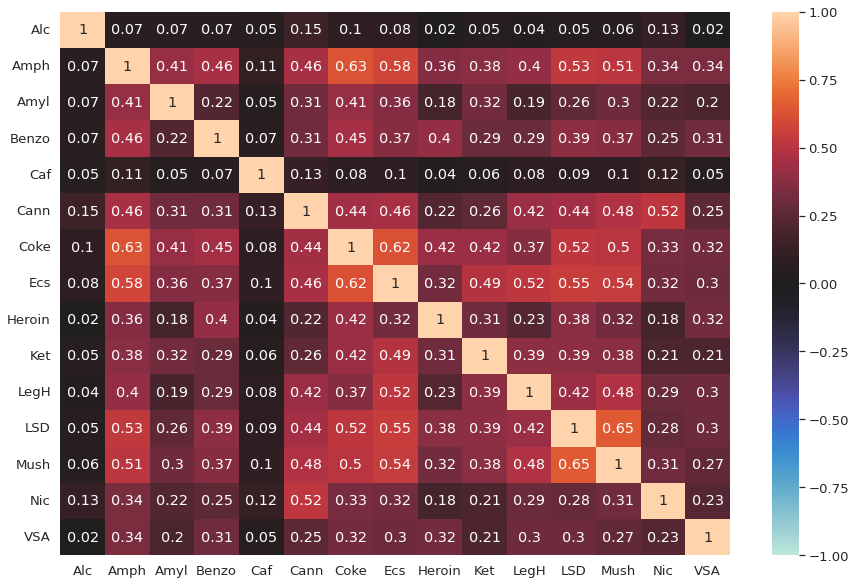

In [ ]:
# Used 'df2eda' to evaluate correlation between drug use variables:
df2eda = df2.drop(['Gender_F', 'Nscore', 'Oscore', 'Escore', "Ascore", 'Cscore', 'SS', 'Impls',
                 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64', 'Age_65+', 'Edu_BS', 'Edu_GradDeg', 'Edu_P.C.', 'Edu_S.U.',
                 'Ctry_AUS/NZ', 'Ctry_CAN', 'Ctry_Othr', 'Ctry_UK/IRL', 'Ethni_Blk', 'Ethni_MB/W/A', 'Ethni_Othr', 'Ethni_Wht'], axis = 1)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df2eda.corr().round(decimals=2), annot = True, vmin=-1, vmax=1, center= 0, ax=ax);

**Observations:**

<p> There is moderate correlation between the use of many of these drugs. Because of this it is likely that only a small number of these will appear significant in our logistic regression model. Future work to explore these relationships could be beneficial to further understand this area. In future efforts interesting results might also be accomplished using a model that better handles correlation between predictor variables than logistic regression does.

In [ ]:
# Fitted Logistic Regression Model 2, with new drug use data incorporated:
tX, vX, tY, vY = tts(df2.drop('Heroin', axis=1), df2['Heroin'], test_size=0.2, random_state=0)
m2 = sm.Logit(tY, tX).fit(maxiter=4000)

Optimization terminated successfully.
         Current function value: 0.239960
         Iterations 20


In [ ]:
print(m2.summary(title = 'Model 2 - Risk of Opioid Abuse', alpha = .05))

                        Model 2 - Risk of Opioid Abuse                        
Dep. Variable:                 Heroin   No. Observations:                 1508
Model:                          Logit   Df Residuals:                     1469
Method:                           MLE   Df Model:                           38
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.4351
Time:                        23:43:17   Log-Likelihood:                -361.86
converged:                       True   LL-Null:                       -640.56
Covariance Type:            nonrobust   LLR p-value:                 1.576e-93
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Gender_F         0.0291      0.216      0.135      0.893      -0.394       0.452
Nscore           0.2158      0.123      1.759      0.079      -0.025       0.456
Escore          -0.0913      0.114     -0.79

In [ ]:
pY_prob = m2.predict(vX)
pY = np.where(pY_prob>0.5, 1, 0)
OOS_accuracy_m2 = sum(pY == vY)/len(vY)
print('Out of Sample Accuracy = ', OOS_accuracy_m2)
auc = roc_auc_score(vY, pY_prob)
print('Area Under ROC Curve = ', auc)

Out of Sample Accuracy =  0.8885941644562334
Area Under ROC Curve =  0.9205917159763314


Observations:
<p> The addition of drug use data resulted in a noticeable improvement in the logistic regression model. For our next step we will remove insignificant variables, which based on these results should yield a very strong model.

##<b>IV: Final Model - Refined Logistic Regression</b>
**For our third logistic regression model, we progressively removed insignificant variables to reach final model**

In [ ]:
# Model 3:
# For space, we represented this as one model. Order in the drop function represents the order in which columns were dropped, with 'Age_65+' being the variable with highest innitial p-value.
df3 = df2.drop(['Age_65+', 'Age_25-34', 'Mush', 'Gender_F', 'Nic',
                'SS', 'Ecs', 'Cann', 'Cscore', 'LegH', 'Escore', 'Amyl',
                'Ethni_Blk', 'Ethni_MB/W/A', 'Ethni_Wht', 'Ethni_Othr', 'Ascore', 'Edu_S.U.', 'Edu_BS', 'Edu_GradDeg',
                'Edu_P.C.', 'Oscore', 'Ctry_AUS/NZ'
                #, 'Alc', 'Age_55-64', 'Age_35-44', 'Age_45-54', 'Impls'
                ], axis = 1)

tX, vX, tY, vY = tts(df3.drop('Heroin', axis=1), df3['Heroin'], test_size=0.2, random_state=0)
m3 = sm.Logit(tY, tX).fit(maxiter=4000)

Optimization terminated successfully.
         Current function value: 0.246412
         Iterations 9


In [ ]:
print(m3.summary(title = 'Model 3 - Risk of Opioid Abuse', alpha = .05))

                        Model 3 - Risk of Opioid Abuse                        
Dep. Variable:                 Heroin   No. Observations:                 1508
Model:                          Logit   Df Residuals:                     1492
Method:                           MLE   Df Model:                           15
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.4199
Time:                        23:43:17   Log-Likelihood:                -371.59
converged:                       True   LL-Null:                       -640.56
Covariance Type:            nonrobust   LLR p-value:                5.243e-105
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Nscore          0.2886      0.099      2.905      0.004       0.094       0.483
Impls           0.2112      0.105      2.002      0.045       0.004       0.418
Alc            -2.3879      0.656     -3.639    

In [ ]:
pY_prob = m3.predict(vX)
lr_p = np.where(pY_prob>0.4, 1, 0)
OOS_accuracy_m3 = sum(lr_p == vY)/len(vY)
print('Out of Sample Accuracy = ', OOS_accuracy_m3)
auc = roc_auc_score(vY, pY_prob)
print('Area Under ROC Curve = ', auc)
rec4 = recall_score(vY, lr_p)
print('True Positive Rate/Recall = ', rec4)

Out of Sample Accuracy =  0.8912466843501327
Area Under ROC Curve =  0.9216863905325443
True Positive Rate/Recall =  0.6923076923076923


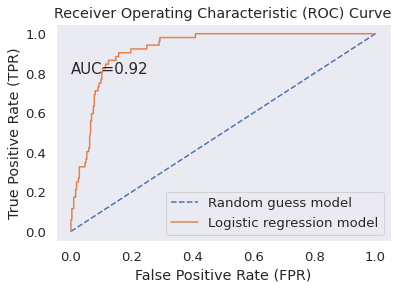

In [ ]:
fpr, tpr, thresholds = roc_curve(vY, pY_prob)

plt.title('Receiver Operating Characteristics')
plt.plot([0,1], [0,1], linestyle='--', label='Random guess model')
plt.plot(fpr, tpr, marker='', label='Logistic regression model')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.text(0, 0.8, f'AUC={auc:.2f}', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid();

Classification Threshold: 40%
Out of Sample Accuracy = 0.89
True Positive Rate = 0.69



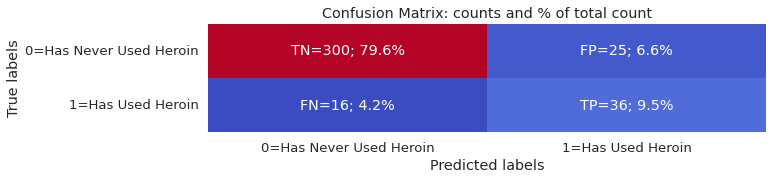

In [ ]:
print('Classification Threshold: 40%')
print('Out of Sample Accuracy = %0.2f' % OOS_accuracy_m3)
print('True Positive Rate = %0.2f' % rec4)
print()
cm = confusion_matrix(vY, lr_p)
MsTxt = np.char.array([['TN','FP'], ['FN','TP']]) + '='
MsTxt = MsTxt + cm.astype('str') + '; ' + (cm/cm.sum() * 100).round(1).astype('str') + '%'
_, ax = plt.subplots(figsize=(10, 2))
aLbl = np.array(['0=Has Never Used Heroin', '1=Has Used Heroin'])
dfCM = pd.DataFrame(cm, index=aLbl, columns=aLbl)
ax = sns.heatmap(dfCM, annot=MsTxt, cbar=False, cmap='coolwarm', fmt='', ax=ax)
ax.set_title('Confusion Matrix: counts and % of total count')
ax.set(xlabel='Predicted labels', ylabel='True labels')
sns.set(font_scale=1.2);

In [ ]:
#Lowered classification threshold to reduce % of false negatives and increase True Positive Rate
pY_prob = m3.predict(vX)
lr_p1 = np.where(pY_prob>0.1, 1, 0)
OOS_accuracy_m31 = sum(lr_p1 == vY)/len(vY)
print('Out of Sample Accuracy = ', OOS_accuracy_m31)
auc = roc_auc_score(vY, pY_prob)
print('Area Under ROC Curve = ', auc)
rec1 = recall_score(vY, lr_p1)
print('True Positive Rate/Recall = ', rec1)

Out of Sample Accuracy =  0.8196286472148541
Area Under ROC Curve =  0.9216863905325443
True Positive Rate/Recall =  0.9038461538461539


Classification Threshold: 10%
Out of Sample Accuracy = 0.82
True Positive Rate = 0.90



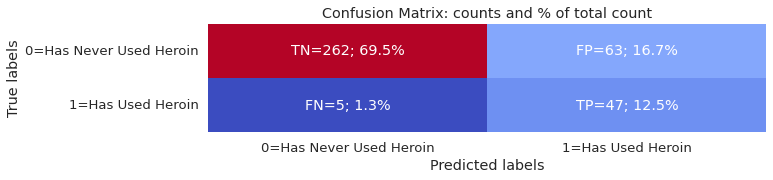

In [ ]:
#New confusion matrix representing lowered classification threshold
print('Classification Threshold: 10%')
print('Out of Sample Accuracy = %0.2f' % OOS_accuracy_m31)
print('True Positive Rate = %0.2f' % rec1)
print()
cm = confusion_matrix(vY, lr_p1)
MsTxt = np.char.array([['TN','FP'], ['FN','TP']]) + '='
MsTxt = MsTxt + cm.astype('str') + '; ' + (cm/cm.sum() * 100).round(1).astype('str') + '%'
_, ax = plt.subplots(figsize=(10, 2))
aLbl = np.array(['0=Has Never Used Heroin', '1=Has Used Heroin'])
dfCM = pd.DataFrame(cm, index=aLbl, columns=aLbl)
ax = sns.heatmap(dfCM, annot=MsTxt, cbar=False, cmap='coolwarm', fmt='', ax=ax)
ax.set_title('Confusion Matrix: counts and % of total count')
ax.set(xlabel='Predicted labels', ylabel='True labels')
sns.set(font_scale=1.2);

Observations:
* After removing all insignificant variables, we see that two personality measurements have a statistically significant impact on the likelihood of heroin use. All other variables remaining equal, an increase neuroticism increases the log-odds of an individual having used heroin. Similarly, an increase in impulsiveness also increases the log-odds of an individual having used heroin.
* Use of cocain, benzodiazepine, amphetamines, ketamine, LSD, and volatile substance abuse were all statistically significant in predicting the risk of opioid abuse. The largest coefficients were associated with cocaine and benzodiazepine. Having used cocaine increased an individual's log-odds of opioid abuse by 2.05 (all other varaibles remainign equal). Having used benzodiazepine increased an individual's log-odds of opioid abuse by 1.79 (all other varaibles remainign equal).
* Correlation between the use of various drugs during EDA indicates that some drug use variables may not have been statistically significance due to correlation with other drugs. As a practical matter, professionals involved in assessing an individuals risk of opioid abuse should not discount use of other drugs not identified as statistically significant in this model.
All other variables remaining equal, use of alcohol or caffeine even once was associated with a reduced risk of opioid abuse (decrease in log-odds of 2.39 and 3.55 respectively). This is a result that is difficult to interpret due to the ubiquitous use of both of these substances in modern society. Additional exploration of this correlation in future research or models would be beneficial.
* While the coefficients varied, being from a country outside of the United States, Australia, or New Zealand was a significant predictor of lower risk of heroin/opioid use. It is possible that the Australia/New Zealand group was statistically insignificant due to the very small number or respondents from those countries. It was expected that being from the US would be associated with an increased risk of opioid abuse.
* All other variables beign equal, being in the age groups 35-44, 45-54, or 55-64 all increased the log-odds of an individual having used heroin relative to the age groups 18-24, 25-34, and 65+ (though the coefficients for each age group varied). This is a difficult result to interpret, because the response variable does not indicate at what age an individual used heroin, only that they used it at some point in their life. These results could be related to the fact that older individuals have lived more years and therefore have had more opportunity to be exposed to drugs. The very small number of survey respondents age 65+ may also impact that age group's lack of significance.
* Initially in Model 3, out of sample accuracy decreased slightly from Model 2(0.889 to 0.883), but AUC improved slightly (0.921 to 0.922). Adjustment of the classification threshold from 0.5 to 0.4 yielded an increased accuracy of 0.891.
While we were very pleased with the accuracy of this model, the intended use of this model for identifying at-risk individuals caused us to be concerned by the number of false negatives. While lowering the classification threshold from 0.5 to 0.1 (50% probabilty of heroin use to 10% probability of heroin use) reduced the OOS accuracy from 0.89 to 0.82, it also reduced the number of false negatives by ~78%. This also increased recall from 0.69 to 0.90.
* In practice/implementation, the lower classification threshold is likely more appropriate for the intended use of this model. Decrease of false negatives/increase in recall means that in practice, our model will be less likely to miss an oportunity to intervene for an at-risk individual. The decrease in model accuracy came largely from an increase in false positives; in practice taking intervention measures with someone who may not need them has very little downside.

##<b>V: Additional Models Evaluated - Alternate Logistic Regression Model, Decision Trees, and Ensemble Models

###Alternate Logistic Regression Model Exploring Drug Use with Granular Use Class Data:
<p> As an alternate model, we investigated several combinations of smaller groups of drugs, each broken down with with the more detailed use-class data. One such model is shown here as an example, but the large numbers of dummy variables made these models large and difficult to work with. Ultimatly none performed as well as the models using binary drug-use variables, and this approach was discarded.

In [ ]:
# "dfa" used for alternate model "a" we investigated several combinations of smaller drugs groups, each broken down with use-class.

dfa = df.copy()

mappingH = {'CL0': 0, 'CL1': 1, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
dfa.replace({'Heroin': mappingH}, inplace=True)

mappingA = {-0.95197: '18-24', -0.07854: '25-34', 0.49788: '35-44', 1.09449: '45-54', 1.82213: '55-64', 2.59171: '65+'}
dfa.replace({'Age': mappingA}, inplace=True)

mappingG = {0.48246: 'Female', -0.48246: 'Male'}
dfa.replace({'Gender': mappingG}, inplace=True)

mappingE = {-2.43591: '<=18', -1.7379: '<=18', -1.43719: '<=18', -1.22751: '<=18', -0.61113: 'S.U.',
            -0.05921: 'P.C.', 0.45468: 'BS', 1.16365: 'GradDeg', 1.98437: 'GradDeg'}
dfa.replace({'Edu': mappingE}, inplace=True)

mappingC = {-0.09765:'AUS/NZ', 0.24923:'CAN', -0.46841:'AUS/NZ', -0.28519:'Othr', 0.21128:'UK/IRL', 0.96082:'UK/IRL', -0.57009:'USA'}
dfa.replace({'Ctry': mappingC}, inplace=True)

mappingEt = {-0.50212:'Asn', -1.10702:'Blk', 1.90725:'MB/W/A', 0.126:'MB/W/A', -0.22166:'MB/W/A', 0.1144:'Othr', -0.31685:'Wht'}
dfa.replace({'Ethni': mappingEt}, inplace=True)

dfa = dfa.drop(['ID', 'Choc', 'Crack', 'Methd','Sem'], axis = 1)

dfa.replace({'Gender': {'Female': 1, 'Male': 0}}, inplace = True)
dfa.rename(columns={'Gender': 'Gender_F'}, inplace = True)

dfa = pd.get_dummies(dfa, columns=['Age', 'Edu', 'Ctry', 'Ethni'])

dfa = dfa.drop(['Ethni_Asn', 'Ctry_USA', 'Edu_<=18', 'Age_18-24'], axis = 1)

#dfa.head().T

In [ ]:
# Cann Alc Ecs Nic
dfa2 = dfa.copy()
#
dfa2 = dfa2.drop(['LSD', 'LegH', 'VSA', 'Caf', 'Mush', 'Amyl', 'Ket', 'Coke', 'Amph', 'Benzo'], axis = 1)

In [ ]:
dfa2 = pd.get_dummies(dfa2, drop_first = True)

#dfa2.head().T

In [ ]:
tX, vX, tY, vY = tts(dfa2.drop('Heroin', axis=1), dfa2['Heroin'], test_size=0.2, random_state=0)
ma = sm.Logit(tY, tX).fit(maxiter=400000)

Optimization terminated successfully.
         Current function value: 0.295920
         Iterations 354


In [ ]:
print(ma.summary(title = 'Model 3 - Risk of Opioid Abuse', alpha = .05))

                        Model 3 - Risk of Opioid Abuse                        
Dep. Variable:                 Heroin   No. Observations:                 1508
Model:                          Logit   Df Residuals:                     1459
Method:                           MLE   Df Model:                           48
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.3033
Time:                        23:43:19   Log-Likelihood:                -446.25
converged:                       True   LL-Null:                       -640.56
Covariance Type:            nonrobust   LLR p-value:                 7.738e-55
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Gender_F        -0.2274      0.193     -1.177      0.239      -0.606       0.151
Nscore           0.2143      0.108      1.983      0.047       0.002       0.426
Escore          -0.1098      0.104     -1.05

In [ ]:
pY_prob = ma.predict(vX)
pY = np.where(pY_prob>0.5, 1, 0)
OOS_accuracy_ma = sum(pY == vY)/len(vY)
print('Out of Sample Accuracy = ', OOS_accuracy_ma)
auc = roc_auc_score(vY, pY_prob)
print('Area Under ROC Curve = ', auc)

Out of Sample Accuracy =  0.883289124668435
Area Under ROC Curve =  0.8727810650887574


Observations:

In this alternative model, our out of sample accuracy decreased slightly, but our AUC decreased significantly from .92 to .88. Therefore model 3 is the most accurate of all

### Decision Tree Models:
<p> We explored two basic versions of a decision tree model. The first used the same binary drug use data as our logistic regression, and the second used the full drug use classes identified in the survey. We selected the most promising for hyperparameter tuning, but ultimately none of the decision tree models produced as strong of results as the logistic regression model.

####Drug use variables as Binary variables (never used/has used):

Accuracy: 0.870026525198939
Area Under ROC Curve =  0.8767455621301775
True Positive Rate/Recall =  0.38461538461538464



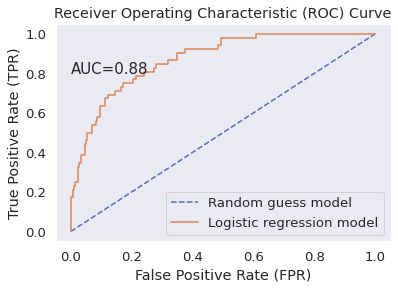

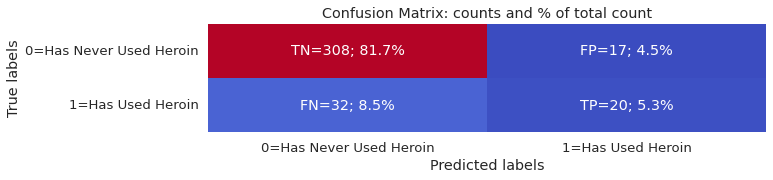

In [ ]:
#dft1
dft1 = df2.copy()

# Split the data into training and validation sets
tX, vX, tY, vY = tts(dft1.drop('Heroin', axis=1), df3['Heroin'], test_size=0.2, random_state=0)

# Define and train the decision tree classifier
dt = DecisionTreeClassifier(random_state=0, max_depth=5)
dt.fit(tX, tY)

# Make predictions on the validation set
vY_pred = dt.predict(vX)

# Calculate accuracy, confusion matrix, AUC, and recall
accuracy = accuracy_score(vY, vY_pred)
cm = confusion_matrix(vY, vY_pred)
auc = roc_auc_score(vY, dt.predict_proba(vX)[:,1])
rec = recall_score(vY, vY_pred)

# Print the results
print('Accuracy:', accuracy)
print('Area Under ROC Curve = ',auc)
print('True Positive Rate/Recall = ', rec)
print()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(vY, pY_prob)
plt.title('Receiver Operating Characteristics')
plt.plot([0,1], [0,1], linestyle='--', label='Random guess model')
plt.plot(fpr, tpr, marker='', label='Logistic regression model')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.text(0, 0.8, f'AUC={auc:.2f}', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()

# Print Confusion matrix
MsTxt = np.char.array([['TN','FP'], ['FN','TP']]) + '='
MsTxt = MsTxt + cm.astype('str') + '; ' + (cm/cm.sum() * 100).round(1).astype('str') + '%'
_, ax = plt.subplots(figsize=(10, 2))
aLbl = np.array(['0=Has Never Used Heroin', '1=Has Used Heroin'])
dfCM = pd.DataFrame(cm, index=aLbl, columns=aLbl)
ax = sns.heatmap(dfCM, annot=MsTxt, cbar=False, cmap='coolwarm', fmt='', ax=ax)
ax.set_title('Confusion Matrix: counts and % of total count')
ax.set(xlabel='Predicted labels', ylabel='True labels')
sns.set(font_scale=1.2);


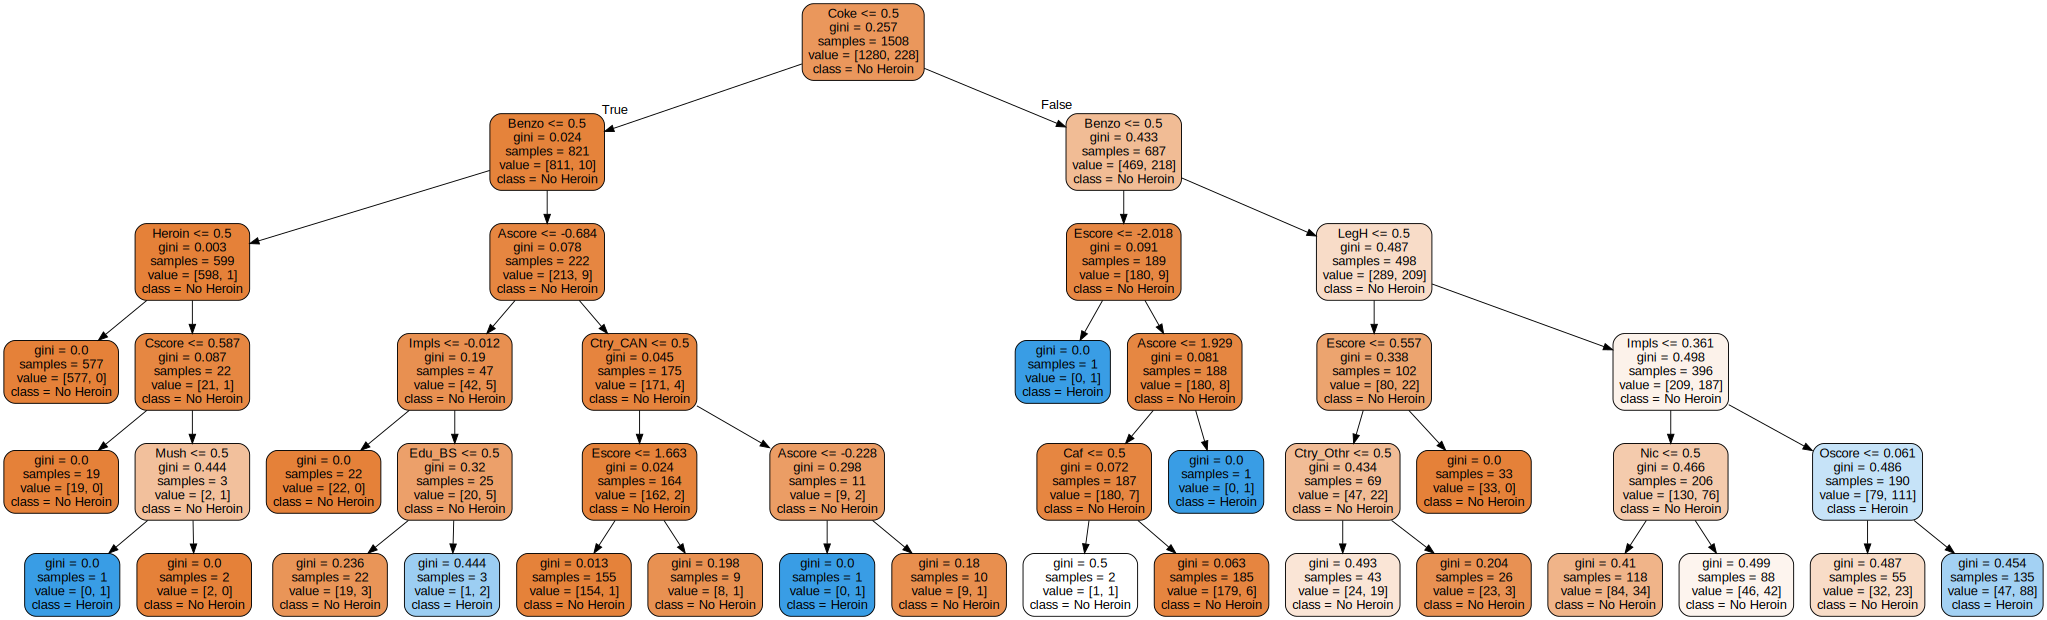

In [ ]:
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=dft1.columns[:-1],class_names=['No Heroin', 'Heroin'], out_file=None)
graphviz.Source(dot_data)

####Drug use variables broken down by use class

In [ ]:
df_encoded = dfa.copy()

# Define the mapping dictionary
mapping = {'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6}


# Apply the mapping dictionary to only the columns with categorical variables
df_encoded[['Alc', 'Amph', 'Amyl', 'Benzo', 'Caf', 'Cann', 'Coke', 'Ecs', 'Ket', 'LegH', 'LSD', 'Mush', 'Nic', 'VSA']] = df[['Alc', 'Amph', 'Amyl', 'Benzo', 'Caf', 'Cann', 'Coke', 'Ecs', 'Ket', 'LegH', 'LSD', 'Mush', 'Nic', 'VSA']].applymap(mapping.get)

# Print the encoded dataset
df_encoded.head()

,Gender_F,Nscore,Escore,Oscore,Ascore,Cscore,Impls,SS,Alc,Amph,...,Edu_P.C.,Edu_S.U.,Ctry_AUS/NZ,Ctry_CAN,Ctry_Othr,Ctry_UK/IRL,Ethni_Blk,Ethni_MB/W/A,Ethni_Othr,Ethni_Wht
0,1,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,...,1,0,0,0,0,1,0,1,0,0
1,0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,...,0,0,0,0,0,1,0,0,0,1
2,0,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,...,1,0,0,0,0,1,0,0,0,1
3,1,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
#dft2
dft2 = df_encoded.copy()

# Split the data into training and validation sets
tX, vX, tY, vY = tts(dft2.drop('Heroin', axis=1), dft2['Heroin'], test_size=0.2, random_state=0)


Accuracy: 0.8753315649867374
Area Under ROC Curve =  0.8705621301775148
True Positive Rate/Recall =  0.5961538461538461



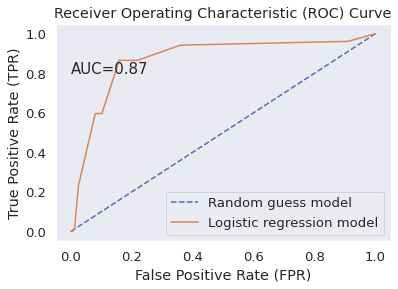

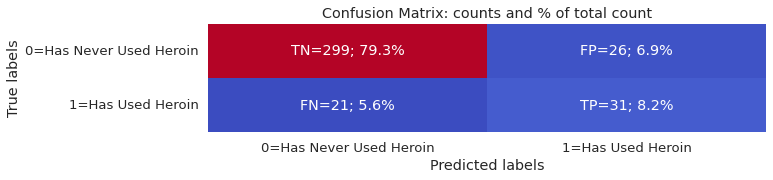

In [ ]:
# Define and train the decision tree classifier
dt = DecisionTreeClassifier(random_state=0, max_depth=5)
dt.fit(tX, tY)

# Make predictions on the validation set
y_val_pred = dt.predict(vX)

# Calculate accuracy, confusion matrix, and AUC
accuracy = accuracy_score(vY, y_val_pred)
cm = confusion_matrix(vY, y_val_pred)
auc = roc_auc_score(vY, dt.predict_proba(vX)[:,1])
rec = recall_score(vY, y_val_pred)

# Print the results
print('Accuracy:', accuracy)
print('Area Under ROC Curve = ',auc)
print('True Positive Rate/Recall = ', rec)
print()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(vY, dt.predict_proba(vX)[:,1])
plt.title('Receiver Operating Characteristics')
plt.plot([0,1], [0,1], linestyle='--', label='Random guess model')
plt.plot(fpr, tpr, marker='', label='Logistic regression model')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.text(0, 0.8, f'AUC={auc:.2f}', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()

# Print Confusion matrix
MsTxt = np.char.array([['TN','FP'], ['FN','TP']]) + '='
MsTxt = MsTxt + cm.astype('str') + '; ' + (cm/cm.sum() * 100).round(1).astype('str') + '%'
_, ax = plt.subplots(figsize=(10, 2))
aLbl = np.array(['0=Has Never Used Heroin', '1=Has Used Heroin'])
dfCM = pd.DataFrame(cm, index=aLbl, columns=aLbl)
ax = sns.heatmap(dfCM, annot=MsTxt, cbar=False, cmap='coolwarm', fmt='', ax=ax)
ax.set_title('Confusion Matrix: counts and % of total count')
ax.set(xlabel='Predicted labels', ylabel='True labels')
sns.set(font_scale=1.2);

'decision_tree.pdf'

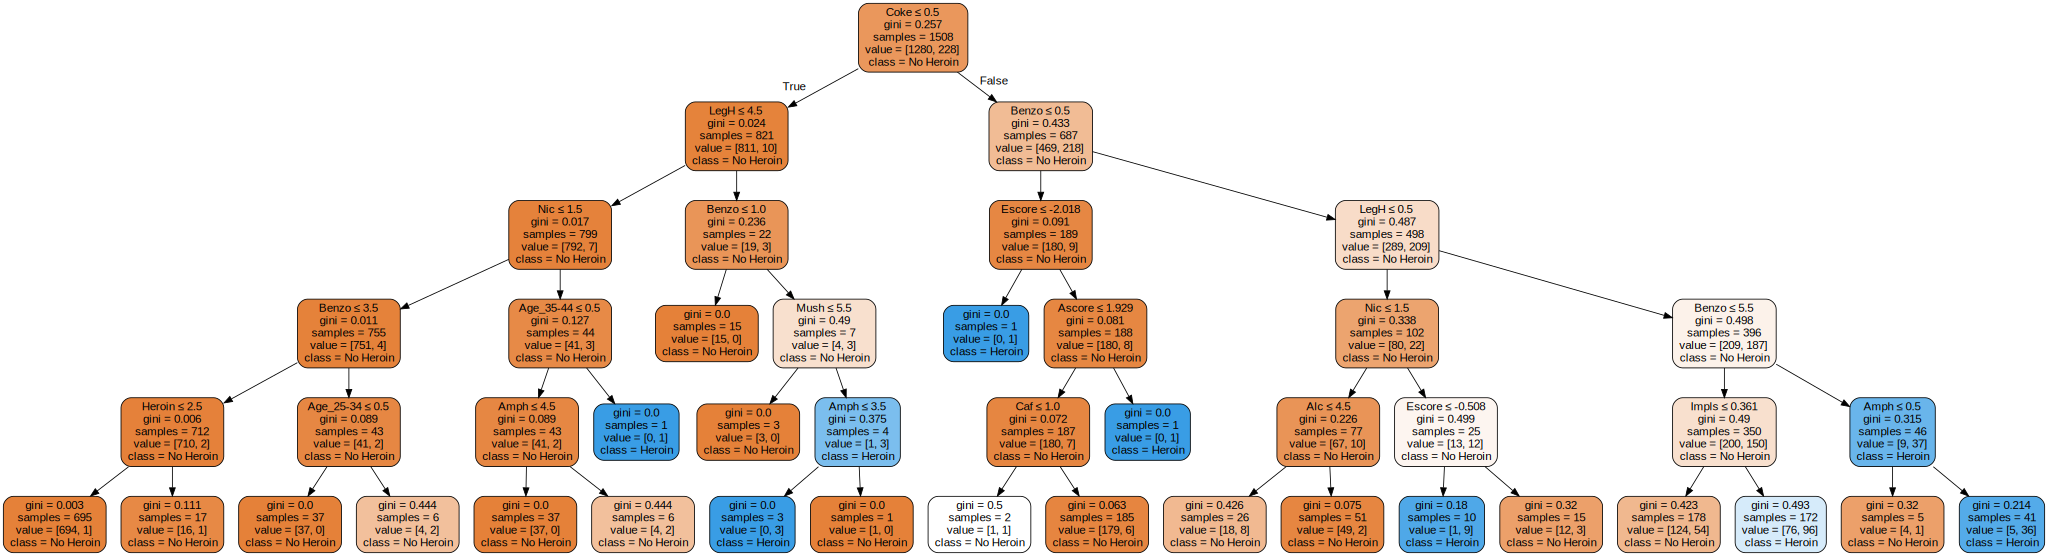

In [ ]:
# Generate a visualization of the decision tree
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=dft1.columns[:-1],
                           class_names=['No Heroin', 'Heroin'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('decision_tree')

# Display the decision tree
graph

Observations:

Comparing both decision tree models, the model using binary variables had a slightly better AUC of .877. However, the model using class variables 0-6 had a slightly better accuracy score of .875 and a significantly better true positive rate/recall score of 0.596.

####Model with Tuned Hyperparameters using Gridsearch
<p> Because of the importance of the true positive rate (discussed in the observations from logistic regression Model 3), we chose to move forward with the model using class variables 0-6 for hyperparameter tuning. This resulted in small increases in all of our evaluation metrics (accuracy, AUC, and recall), but ultimately the decision tree models were still not as effective as our best logistic regression model.

In [ ]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=0)

# Create a GridSearchCV object
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='roc_auc')

# Split the data into training and validation sets
tX, vX, tY, vY = tts(df_encoded.drop('Heroin', axis=1), df_encoded['Heroin'], test_size=0.2, random_state=0)

# Fit the GridSearchCV object to the training data
grid_search.fit(tX, tY)

# Print the best hyperparameters and corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best AUC Score:', grid_search.best_score_)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best AUC Score: 0.8739004000603865


In [ ]:
# Create a new decision tree classifier with the best hyperparameters
#dt_best = DecisionTreeClassifier(random_state=0,
                                 #max_depth=grid_search.best_params_['max_depth'],
                                 #min_samples_split=grid_search.best_params_['min_samples_split'],
                                 #min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
dt_best = DecisionTreeClassifier(random_state=0,
                                 max_depth= 5,
                                 min_samples_split= 1,
                                 min_samples_leaf= 10)

# Fit the new decision tree to the training data
dt_best.fit(tX, tY)

# Make predictions on the validation set
dtb_p = dt_best.predict(vX)

# Calculate the accuracy score, confusion matrix, AUC, and recall:
accuracy = accuracy_score(vY, dtb_p)
cm = confusion_matrix(vY, dtb_p)
auc = roc_auc_score(vY, dt_best.predict_proba(vX)[:,1])
rec = recall_score(vY, dtb_p)

# Print the results
print('Accuracy:', accuracy_score(vY, dtb_p))
print('Area Under ROC Curve = ', roc_auc_score(vY, dt_best.predict_proba(vX)[:,1]))
print('True Positive Rate/Recall = ', recall_score(vY, dtb_p))
print()

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=1,
                       random_state=0)

Accuracy: 0.883289124668435
Area Under ROC Curve =  0.8788461538461538
True Positive Rate/Recall =  0.6153846153846154



'decision_tree.pdf'

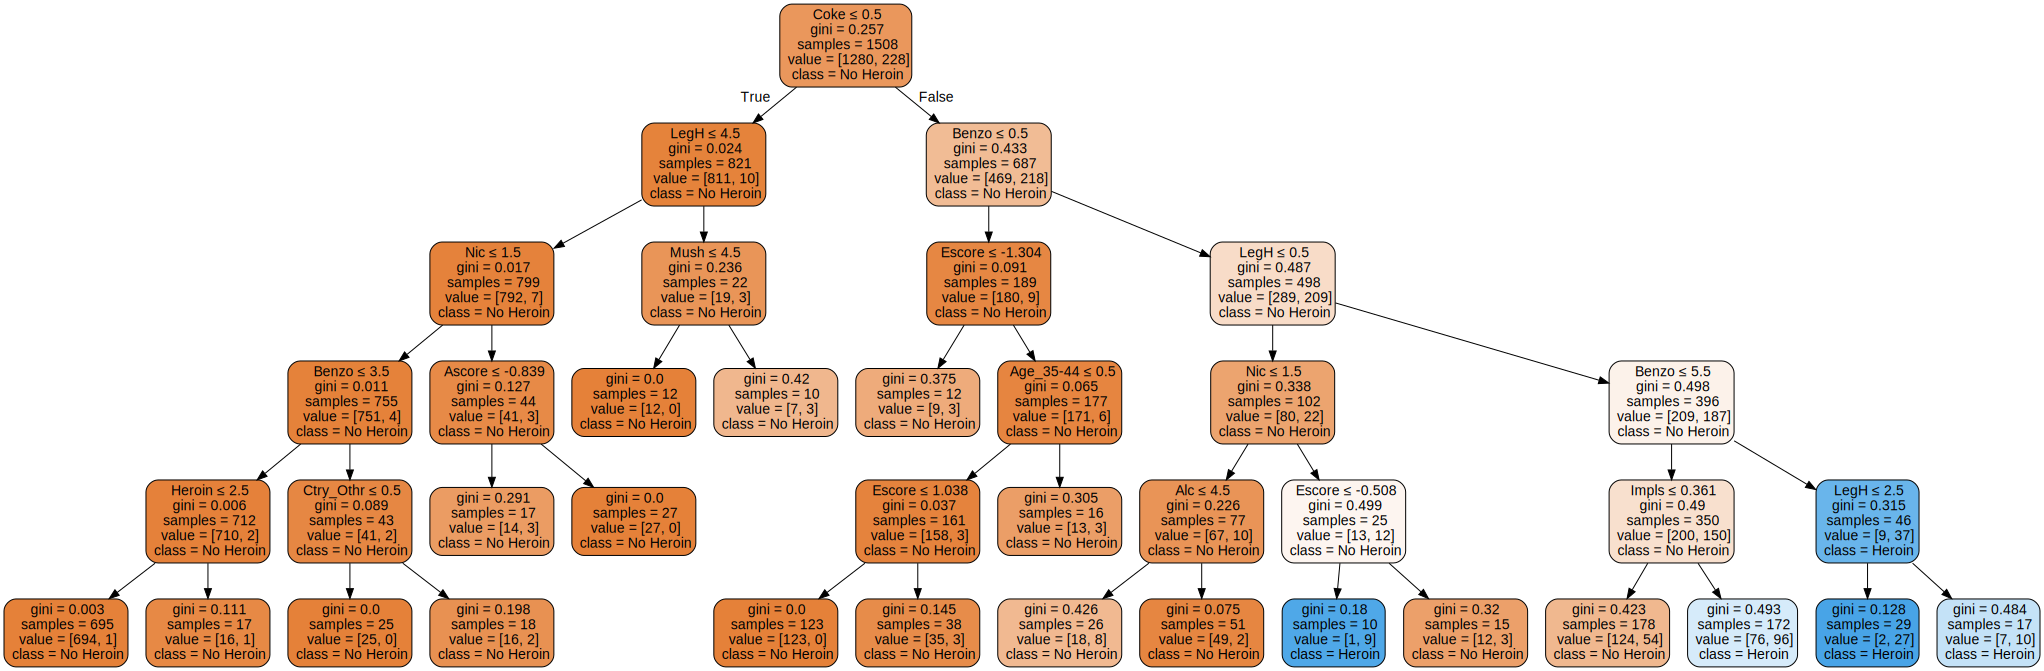

In [ ]:
# Generate a visualization of the decision tree
dot_data = export_graphviz(dt_best, out_file=None,
                           feature_names=dft1.columns[:-1],
                           class_names=['No Heroin', 'Heroin'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('decision_tree')

# Display the decision tree
graph

###Ensemble Models
<p> We explored a number of ensemble models in attempts to improve upon our final logistic regression model and decision tree model. All of these models produced reasonably high accuracy (0.875 - 0.905), but only accomplished AUC's in the low .70's (or 0.637 in the case of the bagging classification), even with GridSearchCV set to identify the highest AUC.
<p>
<p> We had the some success tuning the Random Forest and Extra Tree models, but ultimately these underperformed expectations. This is likely due to not being able to run a comprehensive GridSearch, as attempting to tune several hyperparameters accross a wide range of values at once resulted in code that would run for up to an hour without generating a result. We believe it is likely our Colaboratory notebook does not have adequate processing power to use this tool optimally.

####Random Forest Classification

In [ ]:
dfrf= df_encoded.copy()

In [ ]:
tX, vX, tY, vY = tts(dfrf.drop('Heroin', axis=1), dfrf['Heroin'], test_size=0.2, random_state=0)

In [ ]:
# This code is hashed out to prevent the very long run-time of the GridSearch when running the entire workbook from the top.
# We attempted to tune several hyperparameters, but only max_features delivered improvement.

#param_grid = [{"max_features":[6, 7, 8, 9, 10]}]
#gs = GridSearchCV(estimator=RandomForestClassifier(n_estimators=500, n_jobs=-1, bootstrap=False, random_state = 0), param_grid = param_grid, scoring = 'roc_auc', cv = 10)
#gs.fit(tX, tY)

#bp = gs.best_params_
#print(bp)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state = 0, max_features = 8, bootstrap = False)

rf_model.fit(tX, tY)

RandomForestClassifier(bootstrap=False, max_features=8, n_estimators=500,
                       n_jobs=-1, random_state=0)

In [ ]:
rf_p = rf_model.predict(vX)
rf_as = accuracy_score(vY, rf_p)
rf_auc = roc_auc_score(vY, rf_p)

print('Accuracy Score = ', rf_as)
print('Area Under ROC Curve = ', rf_auc)

Accuracy Score =  0.8859416445623343
Area Under ROC Curve =  0.7238461538461539


In [ ]:
feature_list = []
for name, score in zip(dfrf, rf_model.feature_importances_):
    feature_list.append((score, name))

In [ ]:
sorted(feature_list, reverse=True)

[(0.11946998787159846, 'Benzo'),
 (0.09760712696486686, 'Coke'),
 (0.06184004356613719, 'LegH'),
 (0.05533032132640088, 'Amph'),
 (0.05379558834482416, 'Nscore'),
 (0.05095584025848394, 'Oscore'),
 (0.05070122097839117, 'Escore'),
 (0.04565972465726063, 'Ascore'),
 (0.04348344620729931, 'Cscore'),
 (0.03637383070379632, 'Nic'),
 (0.033816510757664994, 'Impls'),
 (0.032519900649901685, 'SS'),
 (0.03146520738335182, 'Ecs'),
 (0.02954483534751686, 'LSD'),
 (0.028468667778968802, 'Heroin'),
 (0.02461138611997966, 'Alc'),
 (0.024272666927774536, 'Cann'),
 (0.023736433942147972, 'Mush'),
 (0.022839763146608436, 'Ket'),
 (0.02125491241230258, 'Ctry_Othr'),
 (0.017496153892074765, 'Amyl'),
 (0.014743329483578439, 'Caf'),
 (0.008926019497809936, 'Edu_P.C.'),
 (0.008760822029248045, 'Age_65+'),
 (0.00833483448317399, 'Gender_F'),
 (0.007681133249086237, 'Age_35-44'),
 (0.006547961042913695, 'Age_25-34'),
 (0.005868566573884592, 'VSA'),
 (0.0056811391282081845, 'Edu_BS'),
 (0.005540335679909886, 

####Extra Tree Classifier Ensemble

In [ ]:
dfe = df_encoded.copy()

tX, vX, tY, vY = tts(dfe.drop('Heroin', axis=1), dfe['Heroin'], test_size=0.2, random_state = 0)

In [ ]:
# This code is hashed out to prevent the very long run-time of the GridSearch when running the entire workbook from the top.
# We attempted to tune several hyperparameters, but as in the Random Forest model, only max_features delivered improvement.

#param_grid = [{"max_features":[6, 7, 8, 9, 10]}]
#gs = GridSearchCV(estimator=ExtraTreesClassifier(n_estimators=500, n_jobs=-1, bootstrap=False, random_state = 0), param_grid = param_grid, scoring = 'roc_auc', cv = 10)
#gs.fit(tX, tY)
#bp = gs.best_params_
#print(bp)

In [ ]:
ex = ExtraTreesClassifier(n_estimators=500, n_jobs=-1, max_features = 8, bootstrap=False, random_state = 0)
ex.fit(tX, tY)

ExtraTreesClassifier(max_features=8, n_estimators=500, n_jobs=-1,
                     random_state=0)

In [ ]:
ex_p = ex.predict(vX)
ex_as = accuracy_score(vY, ex_p)
ex_auc = roc_auc_score(vY, ex_p)

print('Accuracy Score = ', ex_as)
print('Area Under ROC Curve = ', ex_auc)

Accuracy Score =  0.9045092838196287
Area Under ROC Curve =  0.7265384615384616


In [ ]:
feature_list = []
for name, score in zip(dfe, ex.feature_importances_):
    feature_list.append((score, name))

In [ ]:
sorted(feature_list, reverse=True)

[(0.10681401636036432, 'Benzo'),
 (0.07762859645555012, 'Coke'),
 (0.05400985685085263, 'Amph'),
 (0.044595275210753973, 'LegH'),
 (0.03845233974875572, 'Nic'),
 (0.03791742221940134, 'Ctry_Othr'),
 (0.03486408780455622, 'Heroin'),
 (0.03439834490224665, 'LSD'),
 (0.03333240009439089, 'Nscore'),
 (0.03248942366202536, 'Ecs'),
 (0.032454359217205596, 'Mush'),
 (0.03169447482685312, 'Cann'),
 (0.03155240608385931, 'Impls'),
 (0.030116570574724146, 'SS'),
 (0.029390299371480844, 'Oscore'),
 (0.028583693953994557, 'Ascore'),
 (0.028253599426935783, 'Alc'),
 (0.02814710559559462, 'Escore'),
 (0.027640553196436008, 'Cscore'),
 (0.026888221250415532, 'Ket'),
 (0.024087505952438824, 'Amyl'),
 (0.019837457861255965, 'Caf'),
 (0.01856723488432579, 'Gender_F'),
 (0.0168335215340781, 'Edu_P.C.'),
 (0.015645872873531544, 'Age_65+'),
 (0.015645161659241538, 'Age_35-44'),
 (0.014817278850516381, 'Age_25-34'),
 (0.014280865654489312, 'VSA'),
 (0.011001873558683678, 'Edu_GradDeg'),
 (0.0105307989984501

####Bagged Classification

In [ ]:
# The baseline model for this method did not perform as well as Random Forest or Extra Trees, so we focused our efforts on attempting to tune the first two.
# It was still interesting to build one of these models, since we did not have a homework assignment on it.
bc = BaggingClassifier(DecisionTreeClassifier(max_depth = 5), n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state = 0)

In [ ]:
dfbc = df_encoded.copy()

tX, vX, tY, vY = tts(dfbc.drop('Heroin', axis=1), dfbc['Heroin'], test_size=0.2, random_state=0)

bc.fit(tX, tY)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(max_depth=5),
                  max_samples=100, n_estimators=500, n_jobs=-1, random_state=0)

In [ ]:
bc_p = bc.predict(vX)
bc_as = accuracy_score(vY, bc_p)
bc_auc = roc_auc_score(vY, bc_p)

print('Accuracy Score = ', bc_as)
print('Area Under ROC Curve = ', bc_auc)

Accuracy Score =  0.8885941644562334
Area Under ROC Curve =  0.6365384615384615


####Voting Classifiers (Soft Voting)

In [ ]:
#This was an interesting model to build. We chose to use several of our previously built models in the ensemble, but ultimately it performed about the same as the component models.

d_t = dt
r_f = rf_model
ex = ex
b_c = bc

ensemble = VotingClassifier(estimators=[('DecTr', d_t), ('RandF', r_f), ('ExTr', ex), ('BagMod', b_c)], voting='soft')

In [ ]:
dfvc = df_encoded.copy()

tX, vX, tY, vY = tts(dfvc.drop('Heroin', axis=1), dfvc['Heroin'], test_size=0.2, random_state=0)

ensemble.fit(tX, tY)

VotingClassifier(estimators=[('DecTr', DecisionTreeClassifier(random_state=0)),
                             ('RandF',
                              RandomForestClassifier(bootstrap=False,
                                                     max_features=8,
                                                     n_estimators=500,
                                                     n_jobs=-1,
                                                     random_state=0)),
                             ('ExTr',
                              ExtraTreesClassifier(max_features=8,
                                                   n_estimators=500, n_jobs=-1,
                                                   random_state=0)),
                             ('BagMod',
                              BaggingClassifier(bootstrap=False,
                                                estimator=DecisionTreeClassifier(max_depth=5),
                                                max_samples=100,
                                                n_estimators=500, n_jobs=-1,
                                                random_state=0))],
                 voting='soft')

In [ ]:
en_p = ensemble.predict(vX)
en_as = accuracy_score(vY, en_p)
en_auc = roc_auc_score(vY, en_p)

print('Accuracy Score = ', en_as)
print('Area Under ROC Curve = ', en_auc)

Accuracy Score =  0.8753315649867374
Area Under ROC Curve =  0.7096153846153846


####Voting Classifiers (Hard Voting)
<p> Because our logsitic regression model contained a different set of predictor values than our decision tree-based models, the voting classifier algorithm could not incorporate it into the soft voting model. We manually developed a hard voting model by creating a dataframe containing the validation set predictions of our previous models and taking the mode. This was then compared to the actual values of the validation set to generate accuracy, recall, and AUC metrics. This model came together very close to our deadline, and it would have been very interesting to see if tuning the component models might have eventually been able to result in an improvement on our logistic regression model.

In [ ]:
#Voting Classifier Using Hard Voting: incorporating logist regression, decision tree, random forest, and extra tree models:
dflrp = pd.DataFrame(lr_p, columns = ['logistic'])
dfrfp = pd.DataFrame(rf_p, columns = ['ran_for'])
dfexp = pd.DataFrame(ex_p, columns = ['ext_tr'])
#dfbcp = pd.DataFrame(bc_p, columns = ['bag_cls'])
dfY = vY.to_frame().reset_index()

dfVC = dflrp.copy()
dfVC['ran_for'] = dfrfp['ran_for']
dfVC['ext_tr'] = dfexp['ext_tr']
#dfVC['bag_cls'] = dfbcp['bag_cls']
dfVC['vote'] = dfVC.mode(axis=1)[0]
dfVC['actual'] = dfY['Heroin']
#dfVC.head(20)

In [ ]:
HV_acc = accuracy_score(dfVC['actual'], dfVC['vote'])
HV_auc = roc_auc_score(dfVC['actual'], dfVC['vote'])
print('Accuracy Score = ', HV_acc)
print('Area Under ROC Curve = ', HV_auc)
recHV = recall_score(dfVC['actual'], dfVC['vote'])
print('True Positive Rate/Recall = ', recHV)

Accuracy Score =  0.896551724137931
Area Under ROC Curve =  0.7542307692307693
True Positive Rate/Recall =  0.5576923076923077


##<b>VI: Coding References and Other Citations</b>

**Coding References**

* Stack Overflow - "Correlation matrix plot with coefficients on one side, scatterplots on another, and distributions on diagonal" (https://stackoverflow.com/questions/48139899)
* Stack Overflow - "Histogram of a categorical variable with matplotlib" (https://stackoverflow.com/questions/67311558/histogram-of-a-categorical-variable-with-matplotlib)
* Stack Overflow - "How to create a figure of subplots of grouped bar charts in python" (https://stackoverflow.com/questions/65230006/how-to-create-a-figure-of-subplots-of-grouped-bar-charts-in-python)
* Stack Overflow - "What does the argument mean in fig.add_subplot(111)?" (https://stackoverflow.com/questions/3584805/what-does-the-argument-mean-in-fig-add-subplot111)

**Other References**
* UCI Center for Machine Learning and Intelligent Systems - Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#)
* UCI Machine Learning Repository - "Drug consumption (quantified) Data Set" (https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#)
* National Library of Medicine - Abstract: "The NEO Five-Factor Inventory: Latent Structure and Relationships With Dimensions of Anxiety and Depressive Disorders in a Large Clinical Sample" (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5639474/#:~:text=As%20previously%20mentioned%2C%20the%20NEO,(12%20items%20per%20domain)
* E. Fehrman, A. K. Muhammad, E. M. Mirkes, V. Egan and A. N. Gorban, "The Five Factor Model of personality and evaluation of drug consumption risk.," arXiv, 2015 (https://arxiv.org/pdf/1506.06297.pdf)
* National Library of Medicine - "Prescription Opioids and Heroin Research Report" (https://nida.nih.gov/publications/research-reports/prescription-opioids-heroin/prescription-opioid-use-risk-factor-heroin-use)
* National Library of Medicine - "Illicit use of opioids: is OxyContin a "gateway drug"?" (https://pubmed.ncbi.nlm.nih.gov/17612819/)
* National Library of Medicine - "Opioid Abuse" (https://www.ncbi.nlm.nih.gov/books/NBK448203/)
* US Department of Health and Human Services - "Prevent Opioid Abuse and Addiction" (https://www.hhs.gov/opioids/prevention/index.html)
* Jackson County Combat - "From Prescription Drugs To Heroin Addiction" (https://www.jacksoncountycombat.com/269/From-Rx-Drugs-To-Heroin-Addiction)

* Institute of Electrical and Electronics Engineers - "A machine learning approach to predict volatile substance abuse for drug risk analysis" https://ieeexplore.ieee.org/document/8234516
* Institute of Electrical and Electronics Engineers - "Predicting potential drug abusers using machine learning techniques" (https://ieeexplore.ieee.org/document/8991550)
* Institute of Electrical and Electronics Engineers - "A Machine Learning Approach to Predict Vulnerability to Drug Addiction" (https://ieeexplore.ieee.org/document/9038605)
